In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import xgboost as xgb
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [24]:
df = pd.read_csv('/content/all_labelled.csv', header=None, sep =";")
df.shape

(27870, 5)

In [25]:
df.head(5)

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,39,119,0
2,119,14,109,0,0
3,0,0,37,122,0
4,116,13,100,0,0


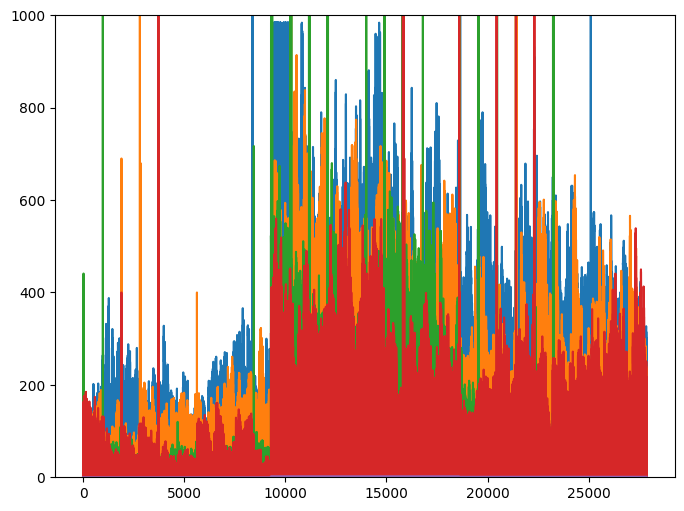

In [54]:
def plot_data(data):    
    fig, axes = plt.subplots(1, 1, figsize=(8, 6), sharex=True, sharey=True)
    axes.plot(data)
    axes.set_ylim([0,1000])
        
plot_data(df)


In [27]:
x = df.iloc[:,:4].copy()
y = df.iloc[:,4].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(27870, 4)
(27870,)


In [28]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [29]:
model_XGB = xgb.XGBClassifier()
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_XGB.fit(x_train, y_train)
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
model_CB = CatBoostClassifier()
model_CB.fit(x_train, y_train)

In [32]:
y_pred = model_RF.predict(x_test)
y_p = model_XGB.predict(x_test)
y_pred_CB = model_CB.predict(x_test)
accuracy_CB = accuracy_score(y_test, y_pred_CB)
accuracy = accuracy_score(y_test, [q for q in y_pred])
accuracy_p = accuracy_score(y_test, [r for r in y_p])
print("Accuracy for RF: %.2f%%" % (accuracy * 100.0))
print("Accuracy for XGB: %.2f%%" % (accuracy_p * 100.0))
print("Accuracy for CatBoost: %.2f%%" % (accuracy_CB * 100.0))

Accuracy for RF: 95.42%
Accuracy for XGB: 95.29%
Accuracy for CatBoost: 95.38%


In [33]:
inputs = tf.keras.Input(shape=(x.shape[1],))
x = tf.keras.layers.Dense(80, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(80, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(8, activation='softmax')(x)

model_cnn = tf.keras.Model(inputs, outputs)

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f3f815d6700>>

In [36]:
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 80)                400       
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 648       
                                                                 
Total params: 7,528
Trainable params: 7,528
Non-trainable p

In [37]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 100

history = model_cnn.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
523/523 [==============================] - 4s 6ms/step - loss: 0.7556 - accuracy: 0.6989 - val_loss: 0.5100 - val_accuracy: 0.8307 - lr: 0.0010
Epoch 2/100
523/523 [==============================] - 1s 3ms/step - loss: 0.4410 - accuracy: 0.8301 - val_loss: 0.4522 - val_accuracy: 0.8873 - lr: 0.0010
Epoch 3/100
523/523 [==============================] - 1s 3ms/step - loss: 0.3626 - accuracy: 0.8685 - val_loss: 0.4593 - val_accuracy: 0.8988 - lr: 0.0010
Epoch 4/100
523/523 [==============================] - 2s 3ms/step - loss: 0.3274 - accuracy: 0.8807 - val_loss: 0.4413 - val_accuracy: 0.9117 - lr: 0.0010
Epoch 5/100
523/523 [==============================] - 1s 3ms/step - loss: 0.3103 - accuracy: 0.8939 - val_loss: 0.4419 - val_accuracy: 0.9141 - lr: 0.0010
Epoch 6/100
523/523 [==============================] - 1s 3ms/step - loss: 0.2886 - accuracy: 0.8975 - val_loss: 0.4454 - val_accuracy: 0.9163 - lr: 0.0010
Epoch 7/100
523/523 [==============================] - 1s 3ms/st

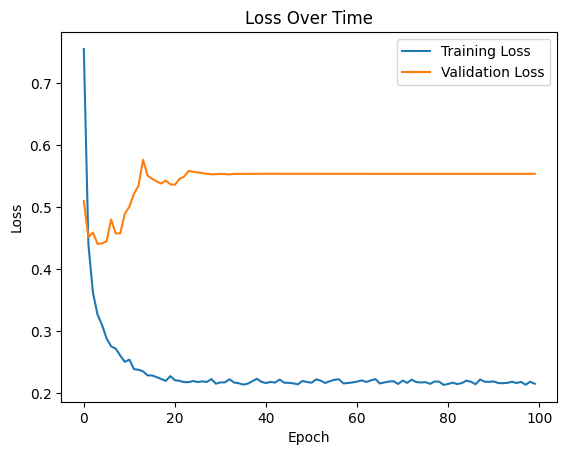

In [38]:
plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Time")

plt.show()

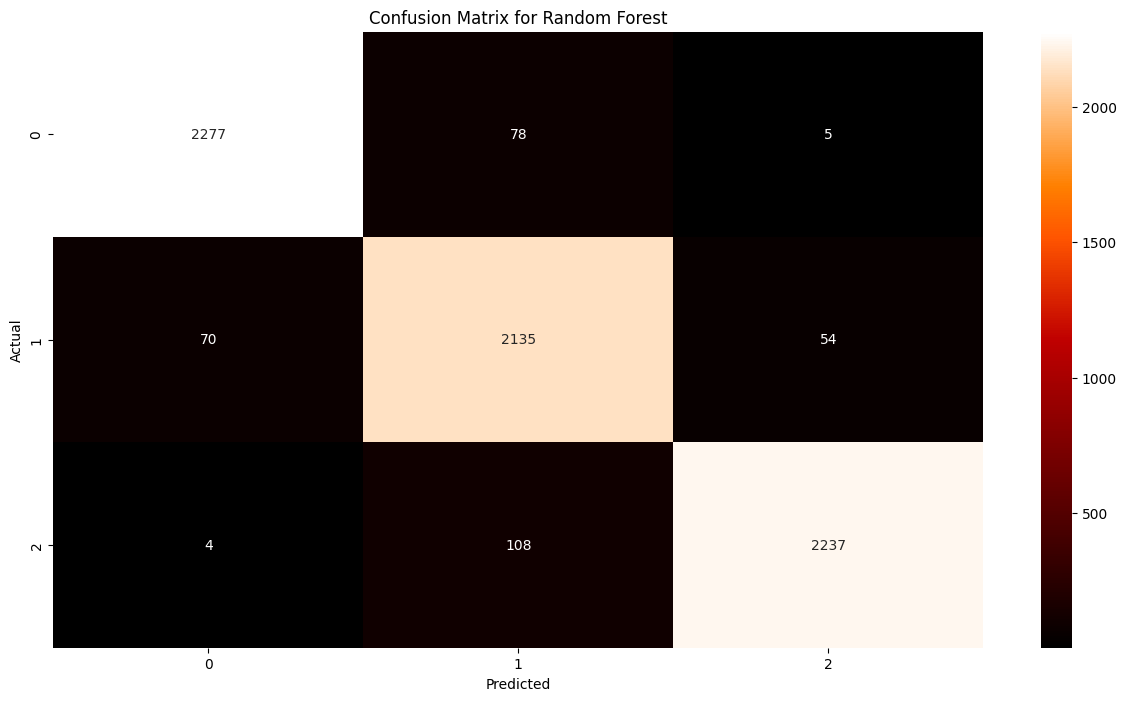

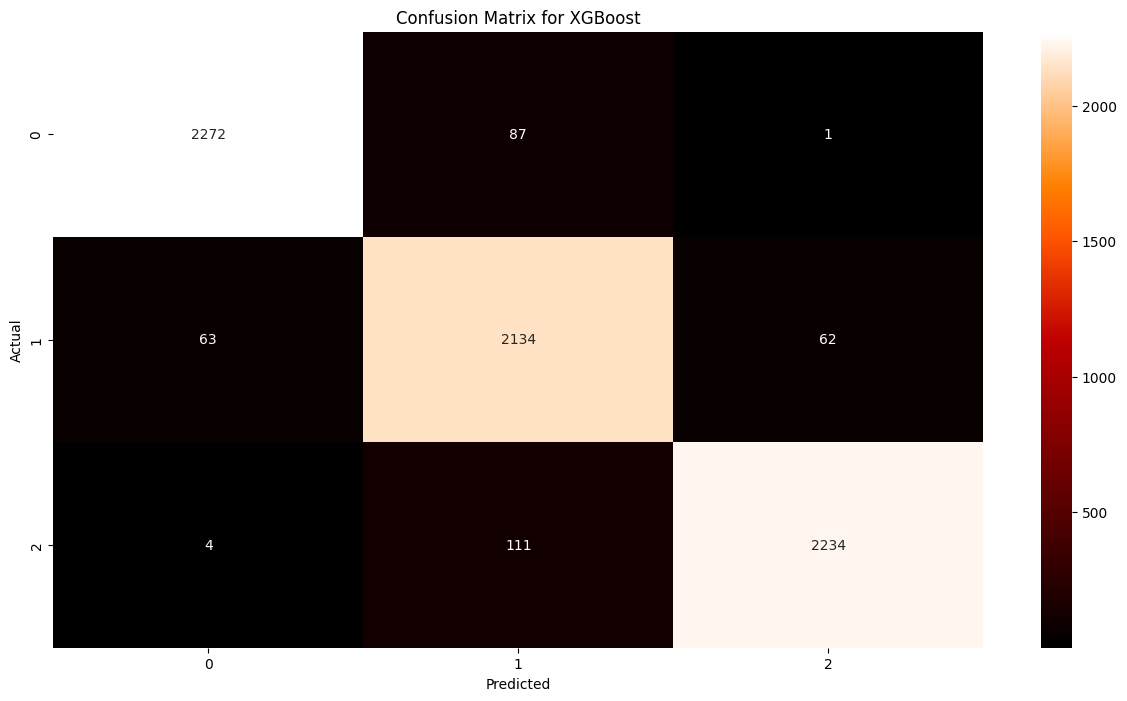

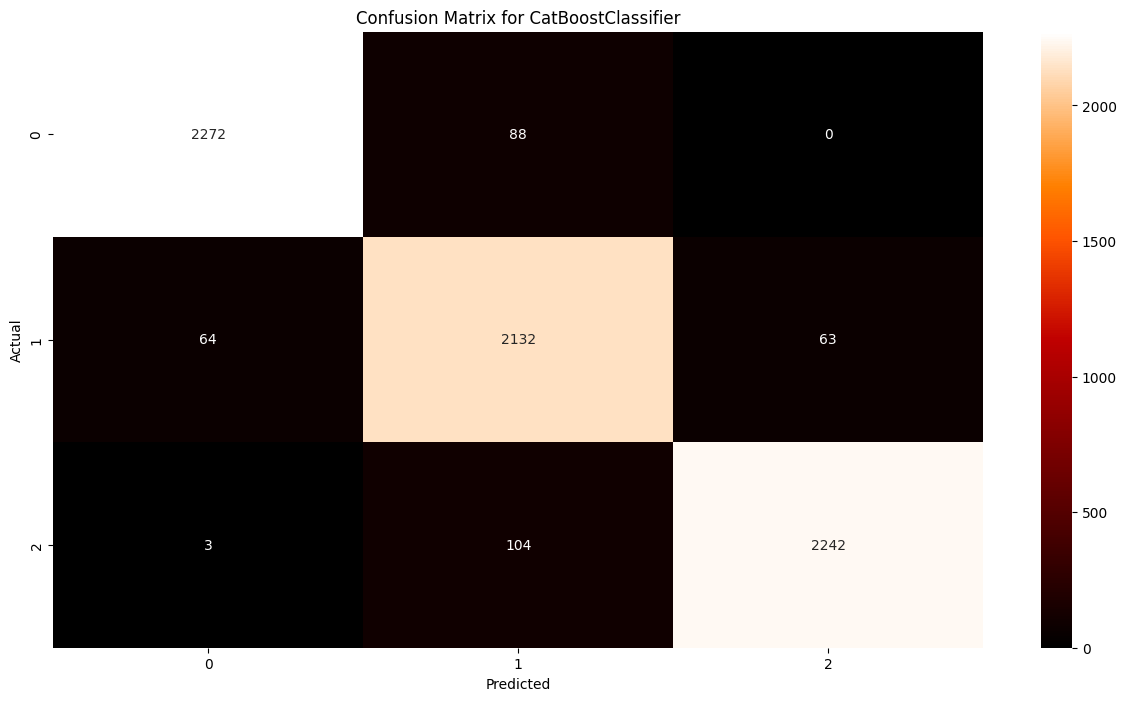

218/218 [==============================] - 1s 4ms/step


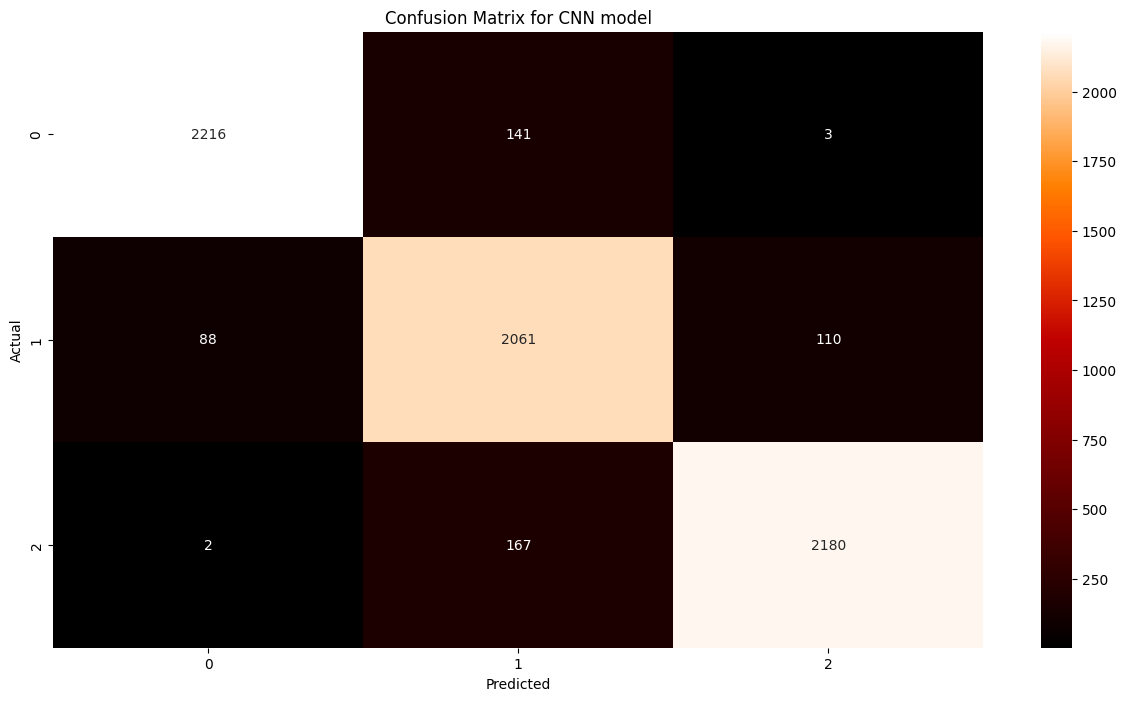

In [39]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Random Forest
y_true = np.array(y_test)
y_pred = np.array(model_RF.predict(x_test))
cm_rf = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (15,8))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Confusion matrix for XGBoost
y_pred_xgb = np.array(model_XGB.predict(x_test))
cm_xgb = confusion_matrix(y_true, y_pred_xgb)
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost")
plt.show()

# Confusion matrix for CatBoostClassifier
y_pred_cb = np.array(model_CB.predict(x_test))
cm_cb = confusion_matrix(y_true, y_pred_cb)
plt.figure(figsize = (15,8))
sns.heatmap(cm_cb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for CatBoostClassifier")
plt.show()

# Confusion matrix for CNN model
y_pred_cnn = np.argmax(model_cnn.predict(x_test), axis=-1)
cm_cnn = confusion_matrix(y_true, y_pred_cnn)
plt.figure(figsize = (15,8))
sns.heatmap(cm_cnn, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for CNN model")
plt.show()


In [40]:
model_cnn.save('cnn_model.h5')
